In [2]:
import pandas as pd

# Load the customer data
customer_data = pd.read_csv('CustomerFrequency/Data/customer_data.csv')

# Load the transaction data
transaction_data = pd.read_csv('CustomerFrequency/Data/transactions_data.csv')

# Display the first few rows of each dataset to understand their structure
customer_data.head(), transaction_data.head()


(   customer_id first_name  last_name      phone_number
 0            0      Laura   Anderson  +374 (49) 082773
 1            1       Alex     Turner  +374 (84) 515643
 2            2    Rebekah  Rodriguez  +374 (57) 405762
 3            3     Brandy     Miller  +374 (94) 879735
 4            4     Dustin     Harper  +374 (18) 104579,
    transaction_id             date_of_payment  customer_id  employee_id  \
 0               1  2022-04-29 02:45:15.334368          425           33   
 1               2  2023-04-10 22:40:50.683041          730           24   
 2               3  2021-08-09 01:53:37.740671           42           44   
 3               4  2022-05-03 09:03:14.431179         1392           41   
 4               5  2021-05-03 18:53:43.274213          638           26   
 
    amount        type  
 0    7970    applepay  
 1   16790  mastercard  
 2    9270        cash  
 3    2010    applepay  
 4   27370        visa  )

Customer Data
customer_id: Unique identifier for each customer.\
first_name: Customer's first name.\
last_name: Customer's last name.\
phone_number: Customer's phone number.\

Transaction Data\
transaction_id: Unique identifier for each transaction.\
date_of_payment: Date and time when the transaction occurred.\
customer_id: Identifier linking the transaction to a specific customer.\
employee_id: Identifier for the employee who handled the transaction.\
amount: The amount of money involved in the transaction.\
type: The payment type (e.g., Apple Pay, MasterCard, cash).\

As we know that the data is without N/A, we can move on data cleaning process


Next Steps:
Convert the date format: Change the date_of_payment column to datetime format.
Analysis: Calculate the number of transactions per customer to begin the segmentation process.

In [3]:
# Convert 'date_of_payment' from object to datetime
transaction_data['date_of_payment'] = pd.to_datetime(transaction_data['date_of_payment'])

# Calculate the number of transactions per customer
transactions_per_customer = transaction_data['customer_id'].value_counts().reset_index()
transactions_per_customer.columns = ['customer_id', 'transaction_count']

# Merge this count back with the customer data for a complete view
customer_transaction_data = pd.merge(customer_data, transactions_per_customer, on='customer_id', how='left').fillna(0)

# Display the first few rows of the merged data
customer_transaction_data.head()


,customer_id,first_name,last_name,phone_number,transaction_count
0,0,Laura,Anderson,+374 (49) 082773,0.0
1,1,Alex,Turner,+374 (84) 515643,2.0
2,2,Rebekah,Rodriguez,+374 (57) 405762,4.0
3,3,Brandy,Miller,+374 (94) 879735,1.0
4,4,Dustin,Harper,+374 (18) 104579,3.0


Data Overview:
customer_id: Unique customer identifier.\
first_name, last_name: Customer's name.\
phone_number: Customer's phone number.\
transaction_count: Number of transactions completed by each customer.\

Next Steps: Define Customer Segments\
We will now define customer segments based on the transaction_count. A simple way to segment might be:\

Frequent Buyers: More than 5 transactions.\
Occasional Buyers: Between 2 and 5 transactions.\
One-Time Buyers: 1 transaction.\
Inactive: No transactions.

In [4]:
# Define customer segments based on transaction count
def categorize_customer(x):
    if x > 5:
        return 'Frequent Buyer'
    elif x >= 2 and x <= 5:
        return 'Occasional Buyer'
    elif x == 1:
        return 'One-Time Buyer'
    else:
        return 'Inactive'

# Apply the categorization function
customer_transaction_data['customer_segment'] = customer_transaction_data['transaction_count'].apply(categorize_customer)

# Display the distribution of customer segments
customer_segment_distribution = customer_transaction_data['customer_segment'].value_counts()
customer_segment_distribution, customer_transaction_data.head()

(customer_segment
 Occasional Buyer    1330
 One-Time Buyer       416
 Inactive             161
 Frequent Buyer        93
 Name: count, dtype: int64,
    customer_id first_name  last_name      phone_number  transaction_count  \
 0            0      Laura   Anderson  +374 (49) 082773                0.0   
 1            1       Alex     Turner  +374 (84) 515643                2.0   
 2            2    Rebekah  Rodriguez  +374 (57) 405762                4.0   
 3            3     Brandy     Miller  +374 (94) 879735                1.0   
 4            4     Dustin     Harper  +374 (18) 104579                3.0   
 
    customer_segment  
 0          Inactive  
 1  Occasional Buyer  
 2  Occasional Buyer  
 3    One-Time Buyer  
 4  Occasional Buyer  )

We have successfully categorized the customers into segments based on their transaction frequency. Here is the distribution of the customer segments:

Occasional Buyer: 1330 customers\
One-Time Buyer: 416 customers\
Inactive: 161 customers\
Frequent Buyer: 93 customers\

# Summary and Insights:
Occasional Buyers are the largest group, suggesting that a significant number of customers return for purchases a few times. Marketing strategies that encourage repeated interactions might be effective here.
One-Time Buyers and Inactive categories represent potential for increasing engagement through promotional campaigns or loyalty programs.
Frequent Buyers, while the smallest group, are likely your most loyal customers and could be targeted with premium offers or membership benefits.

# Visualization

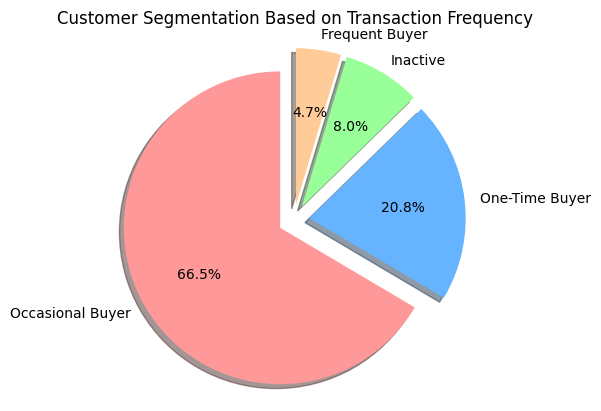

In [5]:
import matplotlib.pyplot as plt

# Create a pie chart for visualizing customer segments
labels = customer_segment_distribution.index
sizes = customer_segment_distribution.values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode all slices for better visibility

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Customer Segmentation Based on Transaction Frequency')
plt.show()


Insights and Strategic Directions:
1. Occasional Buyers (63.3%): This is the largest segment. Strategies to consider include:
    * Loyalty Programs: Introduce or enhance loyalty programs to increase the frequency of visits.
    * Targeted Promotions: Offer promotions on popular items or during specific times to encourage more frequent purchases.
2. One-Time Buyers (19.8%): To reduce churn and convert them into more frequent visitors, consider:
    * Follow-Up Marketing: Implement follow-up marketing strategies, such as feedback requests or second-purchase discounts.
    * Personalized Offers: Use purchase history data to send personalized offers and recommendations.
3. Inactive (7.7%): To re-engage these customers:
    * Reactivation Campaigns: Send reactivation emails or texts with special offers to entice them back.
    * Survey for Feedback: Understand why they have not returned and address these concerns in your services.
4. Frequent Buyers (4.4%): Since this group likely drives a significant portion of revenue:
    * VIP Programs: Create exclusive VIP programs with special perks.
    * Engage with Exclusivity: Offer them exclusive products or early access to new items.


In [10]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

satisfaction_scores = np.random.normal(loc=7, scale=1.5, size=len(customer_transaction_data))

# Clamp the values to ensure they fall within the 1-10 range
satisfaction_scores_clamped = np.clip(satisfaction_scores, 1, 10)

# Round the scores to the nearest whole number to simplify the scale
customer_transaction_data['satisfaction_score'] = np.round(satisfaction_scores_clamped).astype(int)

print(customer_transaction_data.head())

# Attempting to save the updated customer transaction data with satisfaction scores to a CSV file
output_file_path = 'CustomerFrequency/Data/Customer_Transaction_with_Satisfaction.csv'
customer_transaction_data.to_csv(output_file_path, index=False)



   customer_id first_name  last_name      phone_number  transaction_count  \
0            0      Laura   Anderson  +374 (49) 082773                0.0   
1            1       Alex     Turner  +374 (84) 515643                2.0   
2            2    Rebekah  Rodriguez  +374 (57) 405762                4.0   
3            3     Brandy     Miller  +374 (94) 879735                1.0   
4            4     Dustin     Harper  +374 (18) 104579                3.0   

   customer_segment  satisfaction_score  
0          Inactive                   8  
1  Occasional Buyer                   7  
2  Occasional Buyer                   8  
3    One-Time Buyer                   9  
4  Occasional Buyer                   7  


In [11]:
df1 = pd.read_csv('CustomerFrequency/Data/Customer_Transaction_with_Satisfaction.csv')
print(df1.head())

   customer_id first_name  last_name      phone_number  transaction_count  \
0            0      Laura   Anderson  +374 (49) 082773                0.0   
1            1       Alex     Turner  +374 (84) 515643                2.0   
2            2    Rebekah  Rodriguez  +374 (57) 405762                4.0   
3            3     Brandy     Miller  +374 (94) 879735                1.0   
4            4     Dustin     Harper  +374 (18) 104579                3.0   

   customer_segment  satisfaction_score  
0          Inactive                   8  
1  Occasional Buyer                   7  
2  Occasional Buyer                   8  
3    One-Time Buyer                   9  
4  Occasional Buyer                   7  


In [12]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         2000 non-null   int64  
 1   first_name          2000 non-null   object 
 2   last_name           2000 non-null   object 
 3   phone_number        2000 non-null   object 
 4   transaction_count   2000 non-null   float64
 5   customer_segment    2000 non-null   object 
 6   satisfaction_score  2000 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 109.5+ KB
None
       customer_id  transaction_count  satisfaction_score
count  2000.000000        2000.000000          2000.00000
mean    999.500000           2.499500             7.05700
std     577.494589           1.573607             1.47609
min       0.000000           0.000000             2.00000
25%     499.750000           1.000000             6.00000
50%     999.500000           2.00000

In [13]:
correlation = df1['transaction_count'].corr(df1['satisfaction_score'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: 0.002596674867997427


Interpretation of Data Information and Descriptive Statistics:
1. Data.info() output:
    * There are 2000 entries, which means the dataset contains information about 2000 customer transactions.
    * There are 7 columns with no missing values.
    * customer_id, transaction_count, and satisfaction_score are numeric, while the rest are objects (likely strings).
2. Data.describe() output:
    * The average transaction_count is approximately 2.5, suggesting that on average, a customer makes about 2-3 transactions.
    * The mean satisfaction_score is around 7, which is a good sign as it indicates a generally satisfied customer base. However, this is a synthetic dataset, so this interpretation is more about understanding the method rather than deriving actual insights.
    * The range for transaction_count is 0 to 9, and for satisfaction_score, it's 2 to 10. There are no outliers in the satisfaction scores, as all values fall within the expected range.
3. Correlation coefficient output:
    * The correlation coefficient of approximately 0.0026 suggests there is virtually no linear relationship between transaction_count and satisfaction_score.


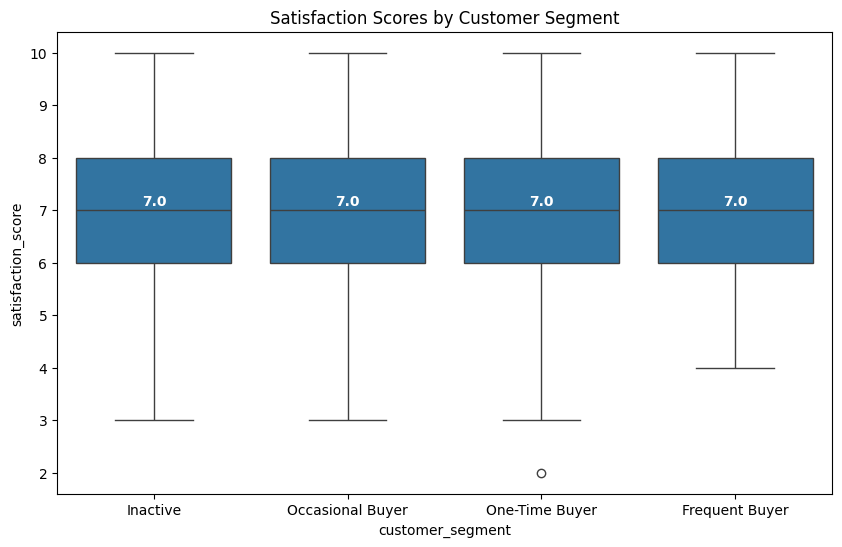

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df1' is the dataframe we're working with
# First, let's recreate the boxplot with clear median annotations
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='customer_segment', y='satisfaction_score', data=df1)
boxplot.set_title('Satisfaction Scores by Customer Segment')

# Annotate medians on the boxplot
medians = df1.groupby(['customer_segment'])['satisfaction_score'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

# Add median annotations
pos = range(len(medians))
for tick, label in zip(pos, boxplot.get_xticklabels()):
    boxplot.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
                 horizontalalignment='center', size='medium', color='w', weight='semibold')

plt.show()


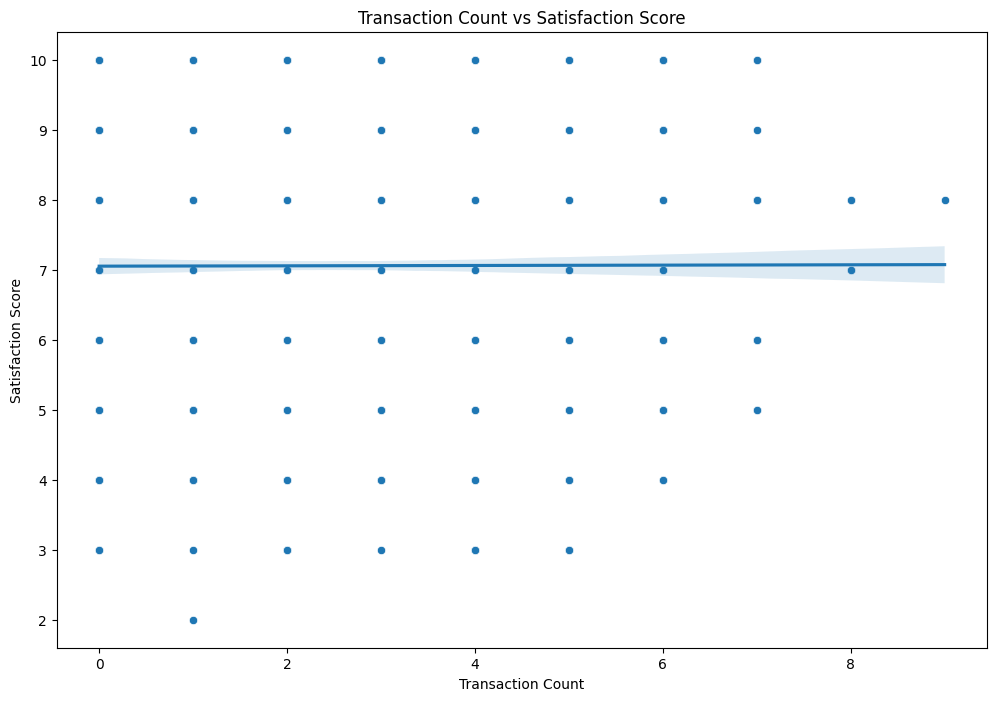

In [21]:

# Now, let's improve the scatter plot
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='transaction_count', y='satisfaction_score', data=df1)

# Fit a trend line regardless of the weak correlation
sns.regplot(x='transaction_count', y='satisfaction_score', data=df1, scatter=False, ax=scatterplot.axes)

scatterplot.set_title('Transaction Count vs Satisfaction Score')
scatterplot.set_xlabel('Transaction Count')
scatterplot.set_ylabel('Satisfaction Score')
plt.show()


1. Boxplot (Satisfaction Scores by Customer Segment):
    * This shows the distribution of satisfaction scores within each customer segment (Inactive, Occasional Buyer, One-Time Buyer, and Frequent Buyer).
    * All segments have a median satisfaction score of 7, indicating a uniform level of satisfaction across different customer types.
    * The spread of scores, as indicated by the length of the boxes and whiskers, shows variability in satisfaction within each segment. However, the consistency of the median suggests that across all segments, customers tend to report a similar level of satisfaction.
2. Scatter Plot (Transaction Count vs Satisfaction Score):
    * The scatter plot displays individual customer data points with their transaction count on the x-axis and satisfaction score on the y-axis.
    * The trend line is flat, which visually confirms the very low correlation coefficient we calculated earlier, suggesting no clear relationship between the number of transactions a customer makes and their reported satisfaction score.
    * The data points are spread widely on the satisfaction score axis for similar transaction counts, further demonstrating that transaction frequency does not necessarily predict satisfaction.
